<a href="https://colab.research.google.com/github/CoderAscia0277/AnimeImages-Stable-Diffusion/blob/main/Animagine_anime_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
from diffusers import (
    StableDiffusionXLPipeline,
    EulerAncestralDiscreteScheduler,
    AutoencoderKL
)

# Load VAE component
vae = AutoencoderKL.from_pretrained(
    "madebyollin/sdxl-vae-fp16-fix",
    torch_dtype=torch.float16
)

# Configure the pipeline
pipe = StableDiffusionXLPipeline.from_pretrained(
    "cagliostrolab/animagine-xl-3.0",
    vae=vae,
    torch_dtype=torch.float16,
    use_safetensors=True,
)
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
pipe.to('cuda')

# Define prompts and generate image
#prompt = "1girl, arima kana, oshi no ko, solo, upper body, v, smile, looking at viewer, outdoors, night"

prompt = "1girl, hu tao, genshin impact, solo, whole body, smug look, japanese yukata,summer festival background, night"
negative_prompt = "nsfw, lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry, artist name"

image = pipe(
    prompt,
    negative_prompt=negative_prompt,
    width=832,
    height=1216,
    guidance_scale=7,
    num_inference_steps=28
).images[0]


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

In [ ]:
!pip install diffusers --upgrade
!pip install transformers accelerate safetensors




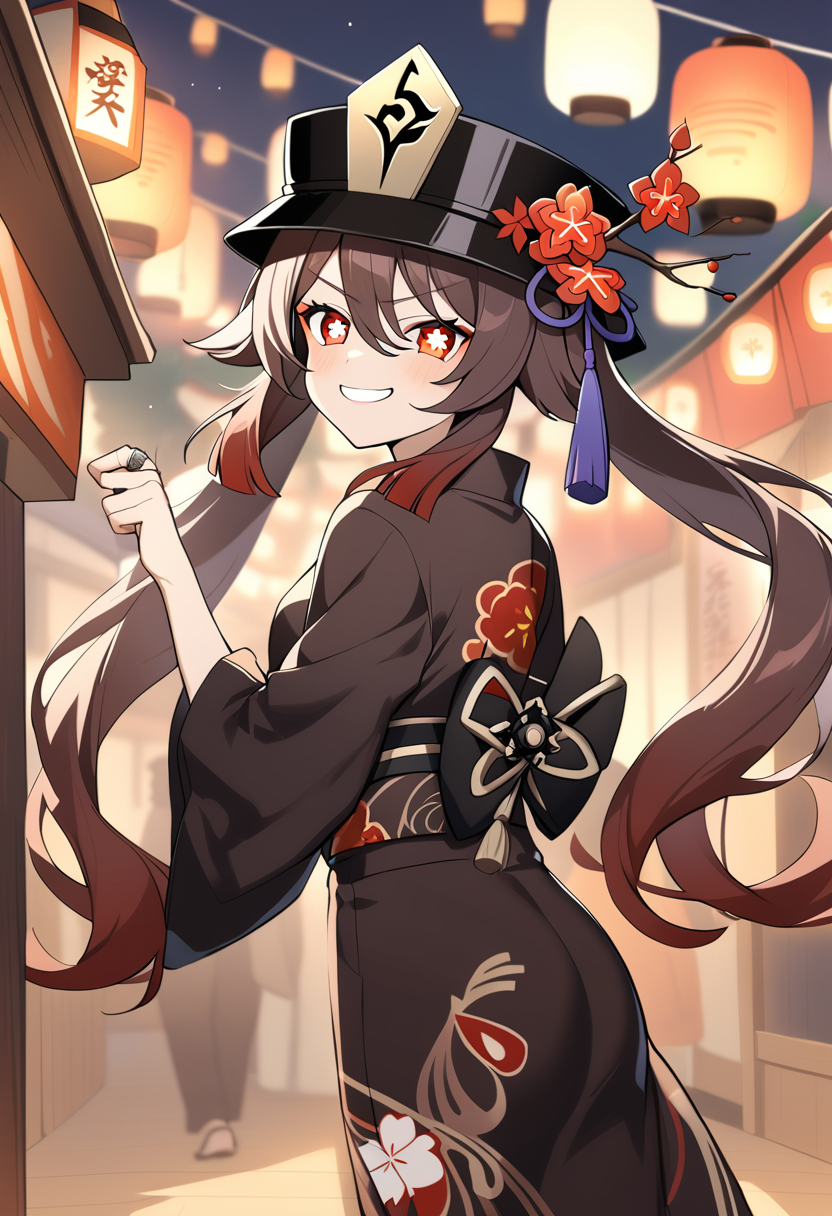

In [4]:
image